# Exploratory Data Analysis

For the first few parts, we take the results scraped on Mar 10 to perform exploration on the data set.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
import wordcloud
import glob

In [2]:
data = pd.read_csv('../data/video_clean.csv', thousands = ',', encoding = 'utf-8')
data[0:5]

,Unnamed: 0,title,view,channel,uploadtime,length,link,subscriber,like,dislike,clean_text
0,0,Unprecedented restrictions in Italy over coron...,22000,CNN,3,498,https://www.youtube.com/watch?v=v_vDjR5zBDk,8710000,735,124,unprecedented restriction italy coronavirus ou...
1,1,New York reels with largest coronavirus outbre...,264000,ABC News,11,237,https://www.youtube.com/watch?v=7JedXOgOPC8,7860000,2082,223,new york reel largest coronavirus outbreak u wnt
2,2,Trump urges calm at coronavirus task force bri...,442000,CBS News,10,351,https://www.youtube.com/watch?v=zSfbAP3emSE,2390000,2610,2208,trump urge calm coronavirus task force briefing
3,3,Governor Cuomo Gives Updates On Coronavirus In...,98000,MSNBC,14,336,https://www.youtube.com/watch?v=06Q1CQd33zM,2420000,711,253,governor cuomo give update coronavirus new yor...
4,4,Coronavirus: Cruise Ship Carrying People With ...,209000,NBC News,10,814,https://www.youtube.com/watch?v=sku3zWvLXnM,1960000,919,101,coronavirus cruise ship carrying people corona...


## Frequency of Words / Tokens 

We combine all the tokens in titles and count the frequency of the key words at one time.

In [3]:
string = data.clean_text.str.split().copy()

#string = string.str.lower()
# np.append(string[1],string[2])
text = []
for i in range(len(data.title.values)):
    text = text + string[i]
text[0:5]

['unprecedented', 'restriction', 'italy', 'coronavirus', 'outbreak']

The first 30 most frequent tokens is shown below.

In [4]:
count1 = Counter(text)

most_c = count1.most_common().copy()
most_c[0:5]

[('coronavirus', 365),
 ('news', 49),
 ('outbreak', 44),
 ('china', 42),
 ('trump', 24)]

"Coronavirus" has the highest frequency(since we searched by it), followed by the "News", "Outbreak", and "China". As the event develops, the ranking will probably change. We will look at this in the later sections.

We removed single letter from the tokens since it had no meanings, but we did not easily remove two-letter tokens from the list because it may be confused with abbrevations.\
Such as: `LA`(Los Angeles) and `la` (Spanish, the)

Obviously there was some Spanish and other language mixing in the token set.

In [5]:
for i in reversed(range(0,len(most_c)-1)):
    if len(most_c[i][0]) == 1:
        print(most_c[i],i)
        most_c.remove(most_c[i])

('v', 1) 549
('b', 1) 448
('e', 5) 81
('l', 5) 79
('u', 22) 7


In [6]:
for i in reversed(range(0,len(most_c)-1)):
    if len(most_c[i][0]) == 2:
        print(most_c[i],i)
most_c.remove(most_c[13])

('nd', 1) 1020
('pt', 1) 993
('hd', 1) 966
('rb', 1) 917
('ba', 1) 898
('su', 1) 888
('si', 1) 879
('au', 1) 773
('pa', 1) 761
('mi', 1) 760
('yo', 1) 758
('br', 1) 750
('im', 1) 743
('di', 1) 734
('tv', 1) 713
('zu', 1) 679
('mp', 1) 430
('ap', 1) 404
('dc', 1) 370
('ny', 1) 364
('go', 1) 346
('lo', 2) 300
('do', 2) 298
('le', 2) 293
('st', 2) 265
('dy', 2) 225
('pm', 2) 217
('qu', 3) 160
('al', 3) 156
('un', 3) 151
('da', 3) 143
('qa', 3) 117
('th', 4) 87
('uk', 4) 85
('se', 5) 72
('dr', 6) 54
('dw', 7) 37
('de', 8) 31
('la', 9) 26
('en', 11) 18
('el', 16) 13


In [7]:
most_c_50 = most_c[1:30]

Since `Coronavirus` had the highest frequency. We focus on the frequency of other tokens except the word `coronavirus` in future analysis.

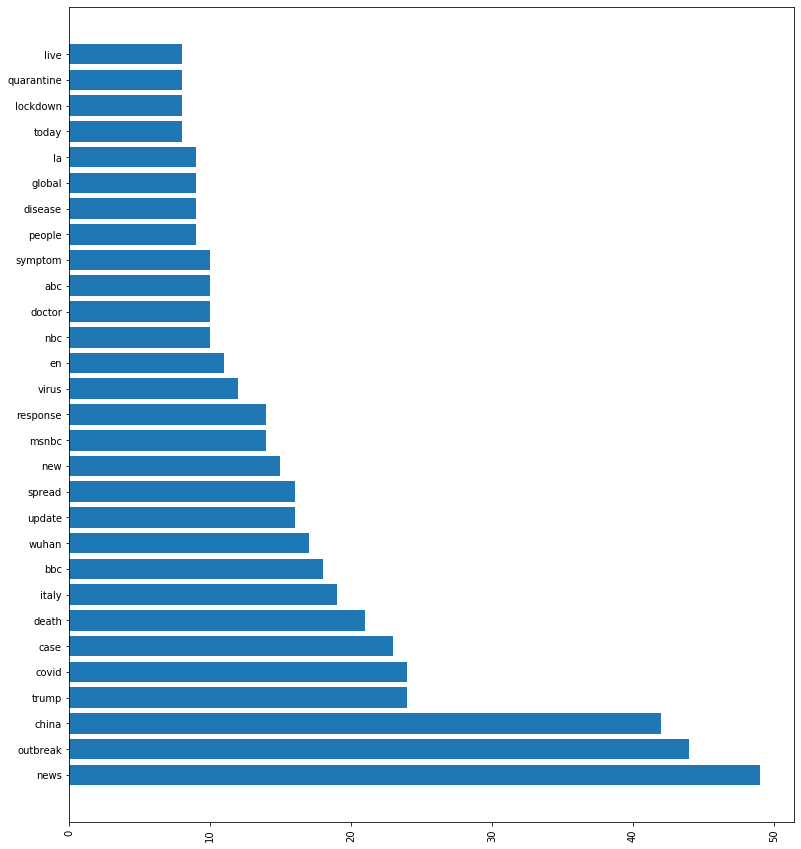

In [8]:
plt.figure(figsize=(13,15))
names, values = zip(*most_c_50)  
plt.barh(names,values)
plt.xticks(rotation=90)
plt.show()

## Channels vs. Subscribers

In [9]:
data1 = data[['channel','subscriber']].copy()
data1 = data1.drop_duplicates().copy()
data1 = data1.sort_values(by='subscriber',ascending = False).copy()
data1[:10]

,channel,subscriber
256,Luisito Comunica,30100000
24,BuzzFeedVideo,20000000
127,Jimmy Kimmel Live,16300000
52,The Lallantop,12000000
53,Saturday Night Live,9910000
254,AsapSCIENCE,9140000
0,CNN,8710000
26,ABS-CBN News,8480000
80,BBC,8150000
1,ABC News,7860000


First 10 results are shown above.

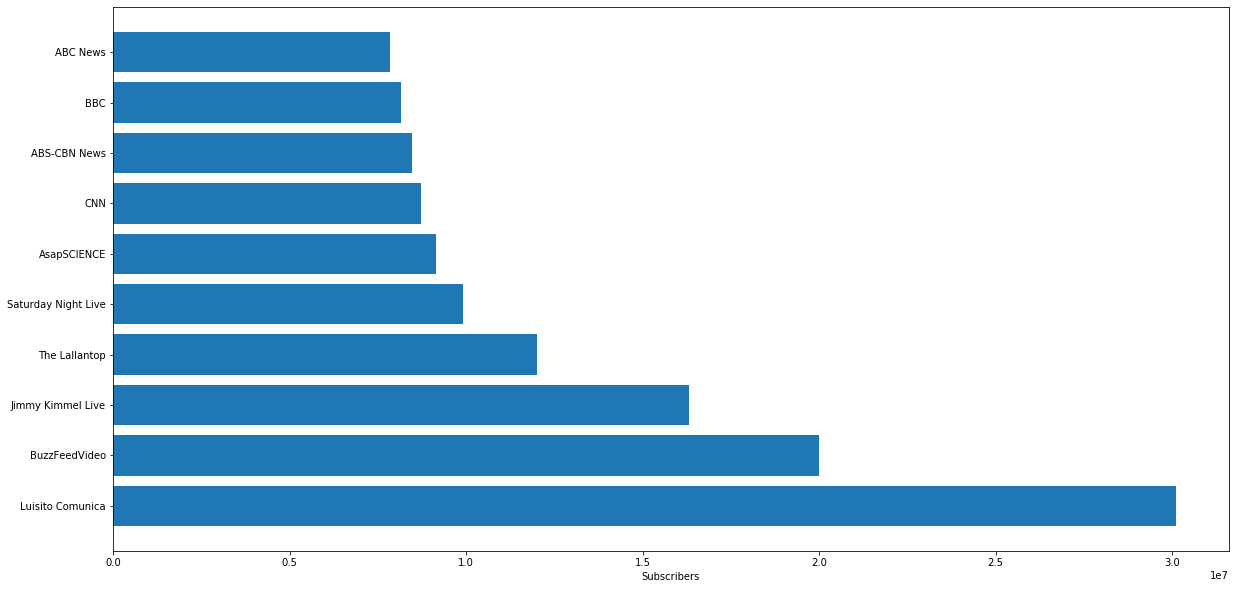

In [10]:
plt.figure(figsize=(20,10))
plt.barh(data1.channel[0:10],data1.subscriber[0:10])
plt.xlabel('Subscribers')
plt.show()

We noticed the variety of uploaders, this includes:
* Traditional International News Stations
* Personal vlogger ('Luisito Comunica')
* New Media
* Talk shows

## Channels vs. Views
Who gain the most number of views on videos?

In [11]:
data1 = data[['channel','view']].copy()
data1 = data1.drop_duplicates().copy()
data1 = data1.sort_values(by='view',ascending = False).copy()
data1[:10]

,channel,view
226,LastWeekTonight,10000000
245,Channel 4 News,9400000
254,AsapSCIENCE,8900000
136,Guardian News,8100000
277,CNN en Español,6900000
221,ABC News In-depth,6100000
283,Doctor Mike,5300000
281,TikTak Draw,5000000
53,Saturday Night Live,4300000
216,The Daily Show with Trevor Noah,4200000


We noticed channels that gain the most views had a variety, concentrating on:
* Self-Media (Doctor Mike)
* Local and International News Stations (ABC, CNN, Guardian)
* Talk Shows (Last Week Tonight, SNL, Daily Show)

Talk shows may be easier to attract more views.

## Who post the most number of videos about coronavirus?

For the first 30 uploaders, based on the first scrape.

In [12]:
plt.figure(figsize=(10,10))
data['channel1'] = 'Others'

data['channel'].values

data['channel'].value_counts()[0:30].index

for i in range(len(data['channel'].values)-1): # process data to make the plot readable
    if data.loc[i,'channel'] in data['channel'].value_counts()[0:30].index:
        data.loc[i,'channel1'] = data.loc[i,'channel']

<Figure size 720x720 with 0 Axes>

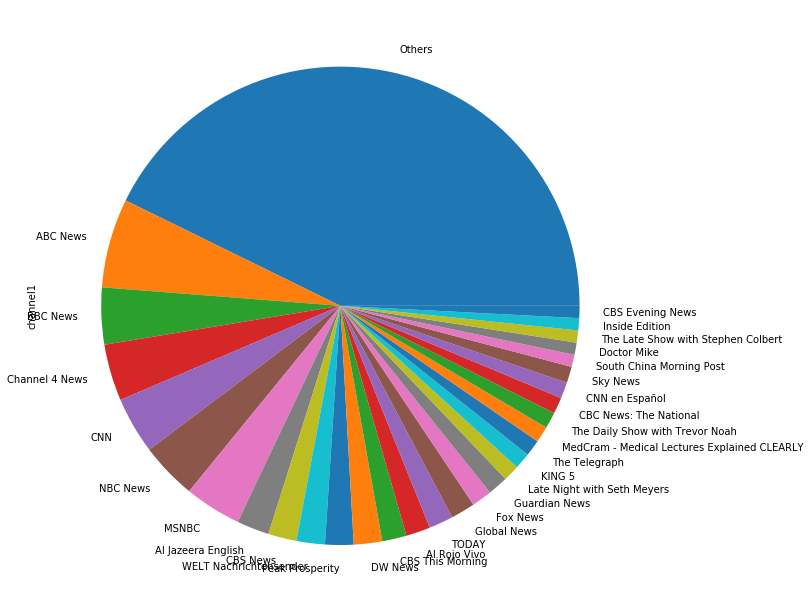

In [13]:
plt.figure(figsize=(11,11))
data['channel1'].value_counts().plot(kind='pie')

We noticed that US News stations and international news stations posted a large proportion of videos.

# Who provided the contents with longest duration?

In [14]:
tot_len = data.groupby('channel', as_index=False).agg({"length": "sum"}).copy()
tot_len = tot_len.sort_values('length',ascending = False)
tot_len

,channel,length
101,Peak Prosperity,860340
93,NBC News,449621
10,Al Jazeera English,274456
142,WELT Nachrichtensender,200626
50,EKSTRAKLASA OFFICIAL ARCHIVES,199440
...,...,...
42,Dettol,62
150,World Video,61
116,TeamCooCoo - Age Restricted,61
47,Dr Vin Tran,56


Text(0.5, 0, 'Length of Videos')

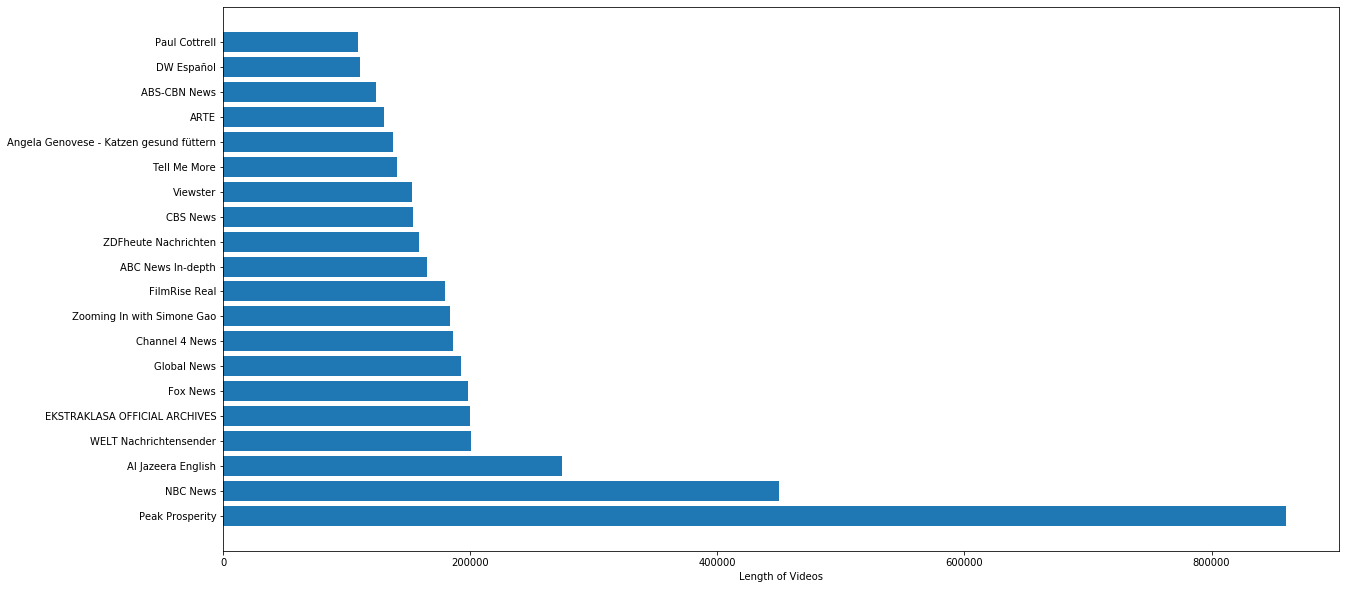

In [15]:
plt.figure(figsize=(20,10))
plt.barh(tot_len['channel'][0:20],tot_len['length'][0:20])
plt.xlabel('Length of Videos')

* Extremely long videos are mostly playbacks of live stream.
* This ranking is different from the list subscribers and views. We suspected that the attractiveness to watch videos might have something to do with the channels and number subscribers as the quality or the contents of videos varied. Also, the recommendation system of the search engine might also affected the number of views.

## Trend of Views at Different Time

For a specific video, we are interested in the how the view increase with time.


* since we have a list of search results in the time range, we can see the temporal change of the video views, likes and so on. Since the increase rate of different videos might be totally different.

In [16]:
filenames = glob.glob("../data/clean/*.csv")
files = [i.split('/')[3] for i in filenames]
filenamelist = [i.split('.')[0] for i in files]
filenamelist = np.sort(filenamelist)
filenamelist

array(['video_03122020_131055_clean', 'video_03122020_162930_clean',
       'video_03122020_194857_clean', 'video_03132020_020920_clean',
       'video_03132020_052811_clean', 'video_03132020_084652_clean',
       'video_03132020_120531_clean', 'video_03132020_184202_clean',
       'video_03132020_220046_clean', 'video_03142020_011950_clean',
       'video_03142020_043854_clean', 'video_03142020_075258_clean',
       'video_03142020_143324_clean', 'video_03142020_175505_clean',
       'video_03142020_211654_clean', 'video_03152020_003817_clean',
       'video_03152020_035739_clean'], dtype='<U27')

In [17]:
name = '../data/clean/'+ filenamelist[-1] + '.csv'
videodata = pd.read_csv(name, thousands = ',', encoding = 'utf-8')
videodata.head()

,Unnamed: 0,title,view,channel,uploadtime,length,link,subscriber,like,dislike,clean_text
0,0,President Trump tests negative for coronavirus...,393000,CNN,11,394,https://www.youtube.com/watch?v=eOB-z-g9v74,8770000,3191,2244,president trump test negative coronavirus whit...
1,1,Coronavirus outbreak: Case numbers rise in Can...,105000,Global News,9,378,https://www.youtube.com/watch?v=MUPJEtAJip4,1250000,651,80,coronavirus outbreak case number rise canada h...
2,2,Will Coronavirus Outbreak Impact 2020 Election...,92000,MSNBC,15,417,https://www.youtube.com/watch?v=IkjSVMcM4mA,2450000,1207,175,coronavirus outbreak impact election joy msnbc
3,3,Coronavirus: 'Get prepared as soon as you can'...,1000000,Sky News,15,572,https://www.youtube.com/watch?v=61-gFtHJOd8,1900000,11762,425,coronavirus get prepared soon say italian doctor
4,4,WATCH LIVE: Trump gives coronavirus update,571000,Washington Post,15,13300,https://www.youtube.com/watch?v=yH4cp4dssGw,1000000,3611,1513,watch live trump give coronavirus update


In [18]:
# get the most viewed video title
title = videodata.loc[videodata['view'].idxmax(),'clean_text']
title

'serious coronavirus infectious disease expert michael osterholm explains joe rogan'

In [19]:
columns = list(videodata.columns)
columns.append('filetime')
columns

['Unnamed: 0',
 'title',
 'view',
 'channel',
 'uploadtime',
 'length',
 'link',
 'subscriber',
 'like',
 'dislike',
 'clean_text',
 'filetime']

In [20]:
videos = pd.DataFrame(columns = columns)
for i in filenamelist:
    name = '../data/clean/'+ i + '.csv'
    videodata = pd.read_csv(name, thousands = ',', encoding = 'utf-8')
    sample = videodata[videodata['clean_text']==title]
    if len(sample) == 0:
        print(i)
        continue
        
    date = int(i.split('_')[1][2:4]) #date
    hour = int(i.split('_')[2][0:2])
    minute = int(i.split('_')[2][2:4])

    time = (date-12)*24 + hour + minute/60
    sample = sample.assign(filetime = [time]) 
    videos = videos.append(sample)
videos.shape

video_03132020_220046_clean
video_03142020_043854_clean
video_03152020_003817_clean


(14, 12)

In [21]:
videos.head()

,Unnamed: 0,title,view,channel,uploadtime,length,link,subscriber,like,dislike,clean_text,filetime
273,273,How Serious is the Coronavirus? Infectious Dis...,11000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3940000,187970,6563,serious coronavirus infectious disease expert ...,13.166667
161,161,How Serious is the Coronavirus? Infectious Dis...,12000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3940000,194768,6822,serious coronavirus infectious disease expert ...,16.483333
189,189,How Serious is the Coronavirus? Infectious Dis...,13000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3950000,200989,7061,serious coronavirus infectious disease expert ...,19.800000
290,290,How Serious is the Coronavirus? Infectious Dis...,14000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3950000,208357,7394,serious coronavirus infectious disease expert ...,26.150000
285,285,How Serious is the Coronavirus? Infectious Dis...,14000000,JRE Clips,48,929,https://www.youtube.com/watch?v=cZFhjMQrVts,3950000,211457,7515,serious coronavirus infectious disease expert ...,29.466667


In [22]:
np.log(videos['view'].values.astype(int))

array([16.21340583, 16.30041721, 16.38045992, 16.45456789, 16.45456789,
       16.45456789, 16.52356076, 16.58809928, 16.58809928, 16.58809928,
       16.6487239 , 16.6487239 , 16.70588232, 16.70588232])

Text(0, 0.5, 'Counts')

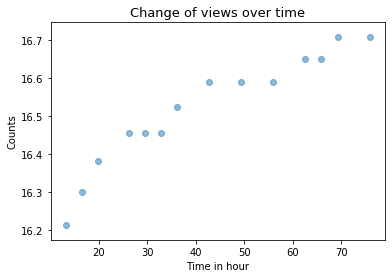

In [23]:
logview = np.log(videos['view'].values.astype(int))
like = (videos['like'].values.astype(int))
likeoview = (videos['like'].values.astype(int))/(videos['view'].values.astype(int))
plt.scatter(videos['filetime'].values,logview, alpha=0.5)
#plt.scatter(videos['filetime'].values,likeoview, alpha=0.5)
            
plt.title('Change of views over time', size=13)
plt.xlabel('Time in hour', size=10)
plt.ylabel('Counts', size=10)
#plt.legend(labels=['views','likes'])                           
                                       

* This figure shows the number of view over time (in hour unit) of a certain video, named 'serious coronavirus infectious disease expert michael osterholm explains joe rogan'.
It seems that the increase rate is approximately stable.

Text(0, 0.5, 'Counts')

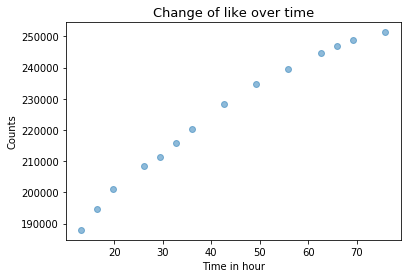

In [24]:
plt.scatter(videos['filetime'].values,like, alpha=0.5)

            
plt.title('Change of like over time', size=13)
plt.xlabel('Time in hour', size=10)
plt.ylabel('Counts', size=10)
#plt.legend(labels=['views','likes'])  

We see similar pattern for the increase of likes over time.

Text(0, 0.5, 'Counts')

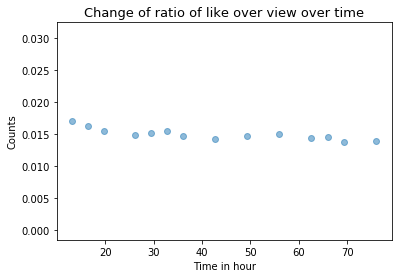

In [25]:
plt.scatter(videos['filetime'].values,likeoview, alpha=0.5)

            
plt.title('Change of ratio of like over view over time', size=13)
plt.xlabel('Time in hour', size=10)
plt.ylabel('Counts', size=10)

What is not suprising is that the ratio of like over view (like ratio) is relatively stable, over the time. Meaning people have similar attitute towards the quality and content of the video.

## Trend of Frequency of Tokens

In [26]:
def wordmap(datafilename):
    """
    Produces a wordmap for each scraping.
    """
    print(datafilename)
    data2 = pd.read_csv(datafilename, thousands = ',', encoding = 'utf-8')
    string2 = data2.clean_text.str.split().copy()
    text2 = []
    for i in range(len(data2.title.values)):
        text2 = text2 + string2[i]

    count2 = Counter(text2)
    most_c_2 = count2.most_common().copy()
    for i in reversed(range(0,len(most_c_2)-1)):
        if len(most_c_2[i][0]) == 1:
            # print(most_c_2[i],i)
            most_c_2.remove(most_c_2[i])
    wc2 = wordcloud.WordCloud(width = 1000,max_words=500, height = 500,background_color="white",
                              collocations = True,relative_scaling=0.2).generate_from_frequencies(dict(most_c_2[1:60]))
    plt.figure(figsize=(20,10))
    plt.imshow(wc2, interpolation="bilinear")
    plt.axis("off")
    plt.show()

First Scrape on March 10
../data/video_clean.csv


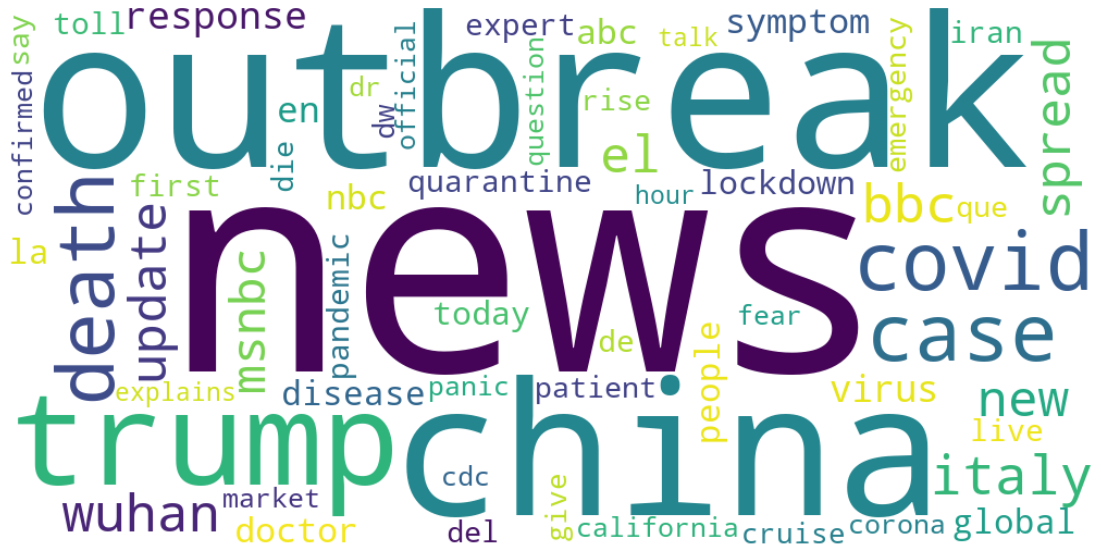

In [27]:
print('First Scrape on March 10')
wordmap('../data/video_clean.csv')

../data/clean/video_03122020_131055_clean.csv


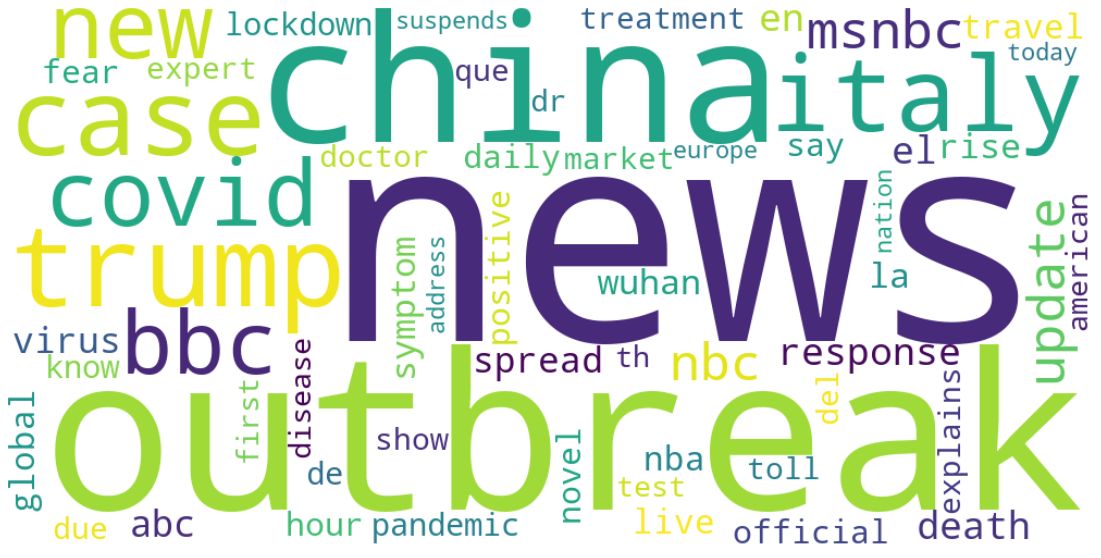

In [28]:
wordmap('../data/clean/' + filenamelist[0]+ '.csv')

../data/clean/video_03132020_052811_clean.csv


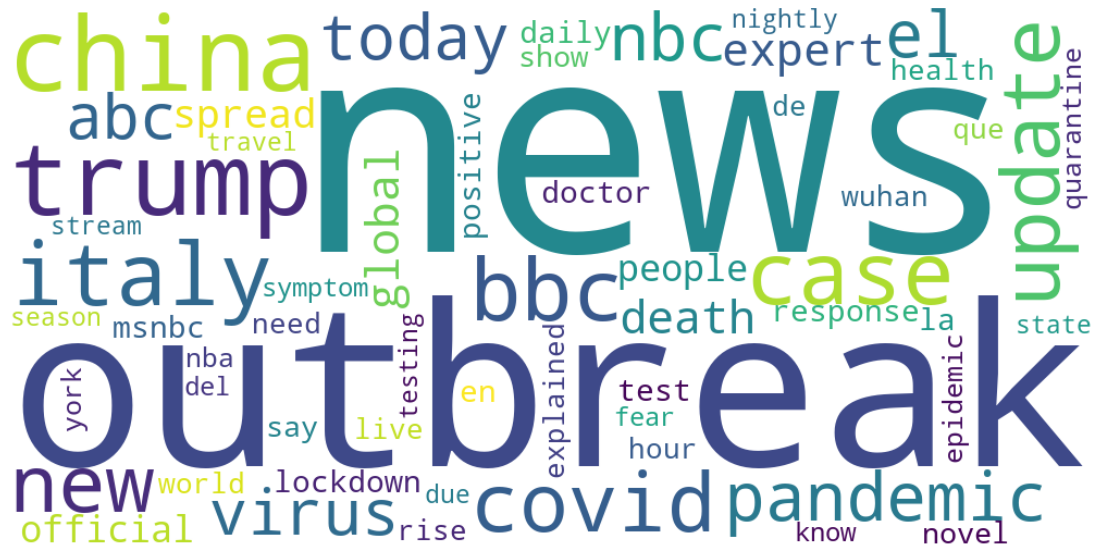

In [29]:
wordmap('../data/clean/' + filenamelist[4]+ '.csv')

../data/clean/video_03132020_220046_clean.csv


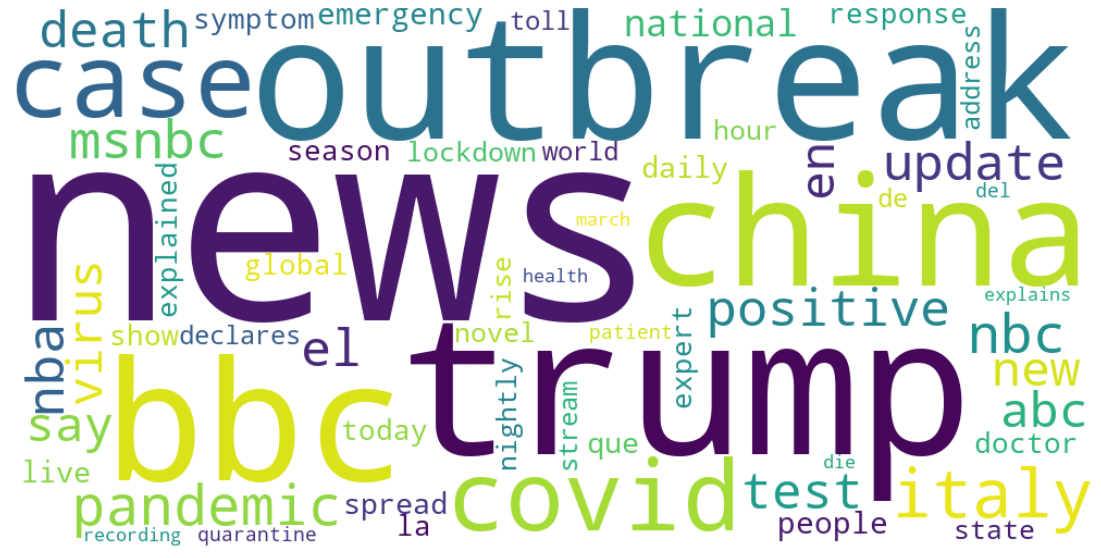

In [30]:
wordmap('../data/clean/' + filenamelist[8]+ '.csv')

../data/clean/video_03142020_143324_clean.csv


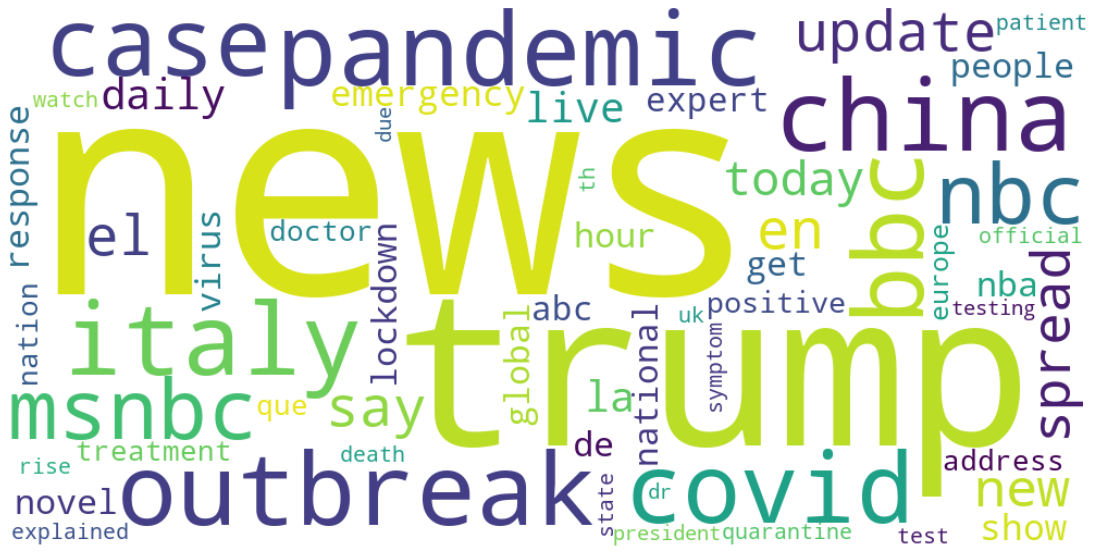

In [31]:
wordmap('../data/clean/' + filenamelist[12]+ '.csv')

../data/clean/video_03152020_035739_clean.csv


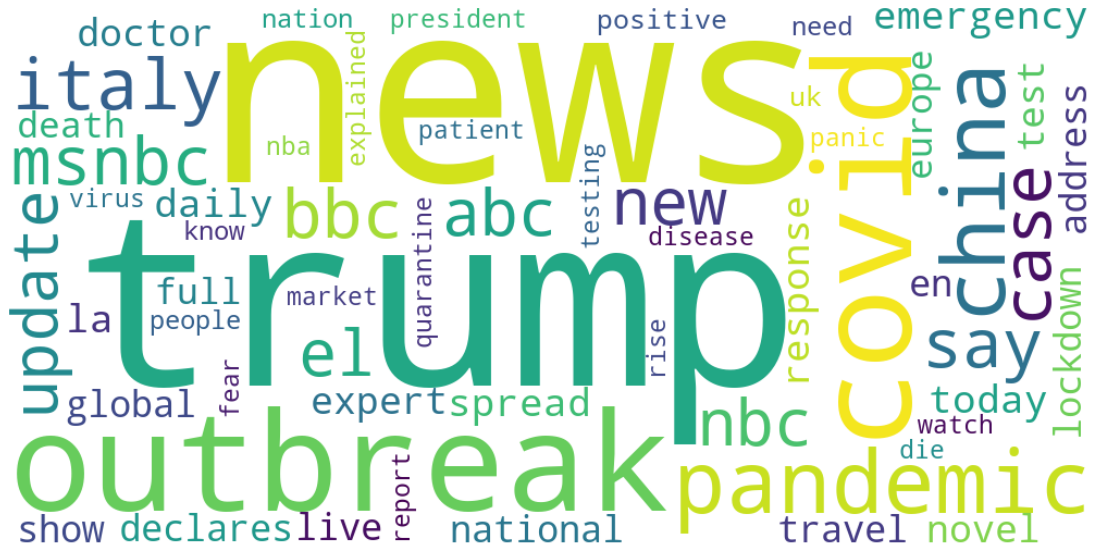

In [32]:
wordmap('../data/clean/' + filenamelist[16]+ '.csv')

We tried to see how the event evolved in these days, from March 10 to March 15.
* Most of the key words remained high frequency such as "News", "Outbreak" and "COVID(-19)". These word are essential parts of the titles of videos about coronavirus. 
* We noticed as Trump had more speeches and orders, the frequency of "Trump" generally increased. 
* As China had the pneumonia controlled, the frequency of "China" and "Wuhan" acturally decreased. 
* As the community spread become more severe in multiple positions in European countries and north America, we saw some new names of regions in the newer word maps.
* Many regions declared state of "Emergency" so this token appeared.